# HOSPITAL RATING CLASSIFICATION

Welcome to the Starter Code for the Hospital Rating Classification Capstone Project!

In this notebook you'll find 
- A blueprint on how to attempt the course project.
- Additional hints and directions on different tasks

Please note that this approach is one of the many approaches you can take for solving this Capstone project.

### Import the necessary libraries

In [5]:
import pandas as pd, numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.core.common import random_state

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [6]:
import warnings
warnings.filterwarnings("ignore")

### Task 1 

Task 1: Understand the data

 

Take some time to familiarize yourself with the data. What are the key variables?

Specifically, answer the following questions:

- 1.1 - Perform a few basic data quality checks to understand the different columns and prepare descriptive statistics for some of the important columns.
- 1.2 - What is the distribution of hospital overall ratings? How are they varying across other parameters like `State`? Create  a few visualizations that provide some insights into the data.

##### Task 1.1

In [37]:
df = pd.read_csv(r"C:\Users\Nikhil\Downloads\hospital-info.csv")
df.describe()
df['Mapped Ratings'].dtypes

KeyError: 'Mapped Ratings'

In [9]:
##Check the data type of the different columns
## Hint - You can use the .info() method here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

In [11]:
# Correcting data types
df['ZIP Code'] = df['ZIP Code'].astype(str)  # Convert ZIP Code to string

# Converting selected variables to categorical
categorical_cols = ['Hospital Name', 'Address', 'City', 'State', 'County Name', 'Hospital Ownership', 'Emergency Services']
for col in categorical_cols:
    df[col] = df[col].astype('category')


Note down your observations after completing the above task. You should ask questions such as:

- Check for non-null columns. Do you see any column having missing values?
- Are the datatypes correct for all the variables? You might have to convert a few of them to categorical later

##### Task 1.2

In [10]:
## Descriptive Statistics
## Let's take the main measures and the hospital overall rating first.
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

In [12]:
### Filter out the above columns from the DataFrame and compute the descriptive statistics
### Hint - The .describe() method might be useful
features_df = df[features]
features_df.describe()

,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
count,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000
mean,1.018973,1.042852,0.981681,0.937848,1.192673,0.976447,1.006215
std,0.492383,0.693884,0.731887,0.799253,0.647062,0.750720,0.478217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
### Analyze your target variable - "Hospital overall rating"
### How does the ratings distribution look like for all the hospitals?

## Hint - You can use seaborn plots like countplot() for checking distribution of the ratings
## Hint - You can plot a correlation heatmap to check the correlation between the main measures stored in "features"
## Hint - You can also check the correlations between the "Hospital overall rating" and other measures


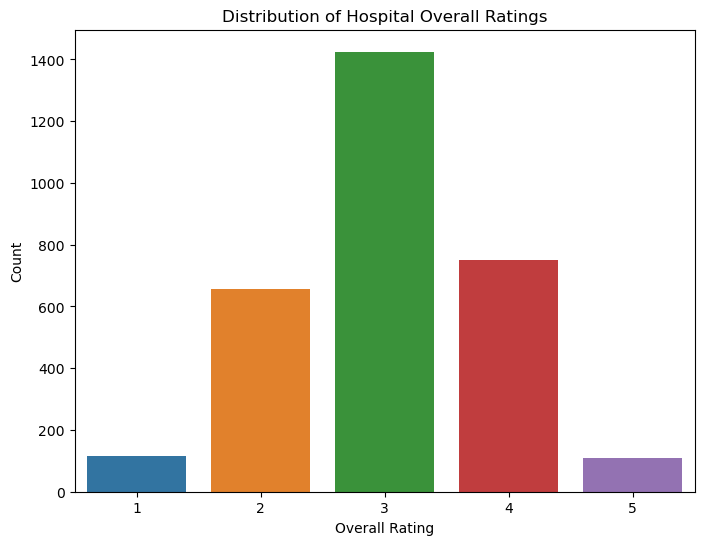

In [13]:
# Plotting the distribution of hospital overall ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Hospital overall rating')
plt.title('Distribution of Hospital Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()


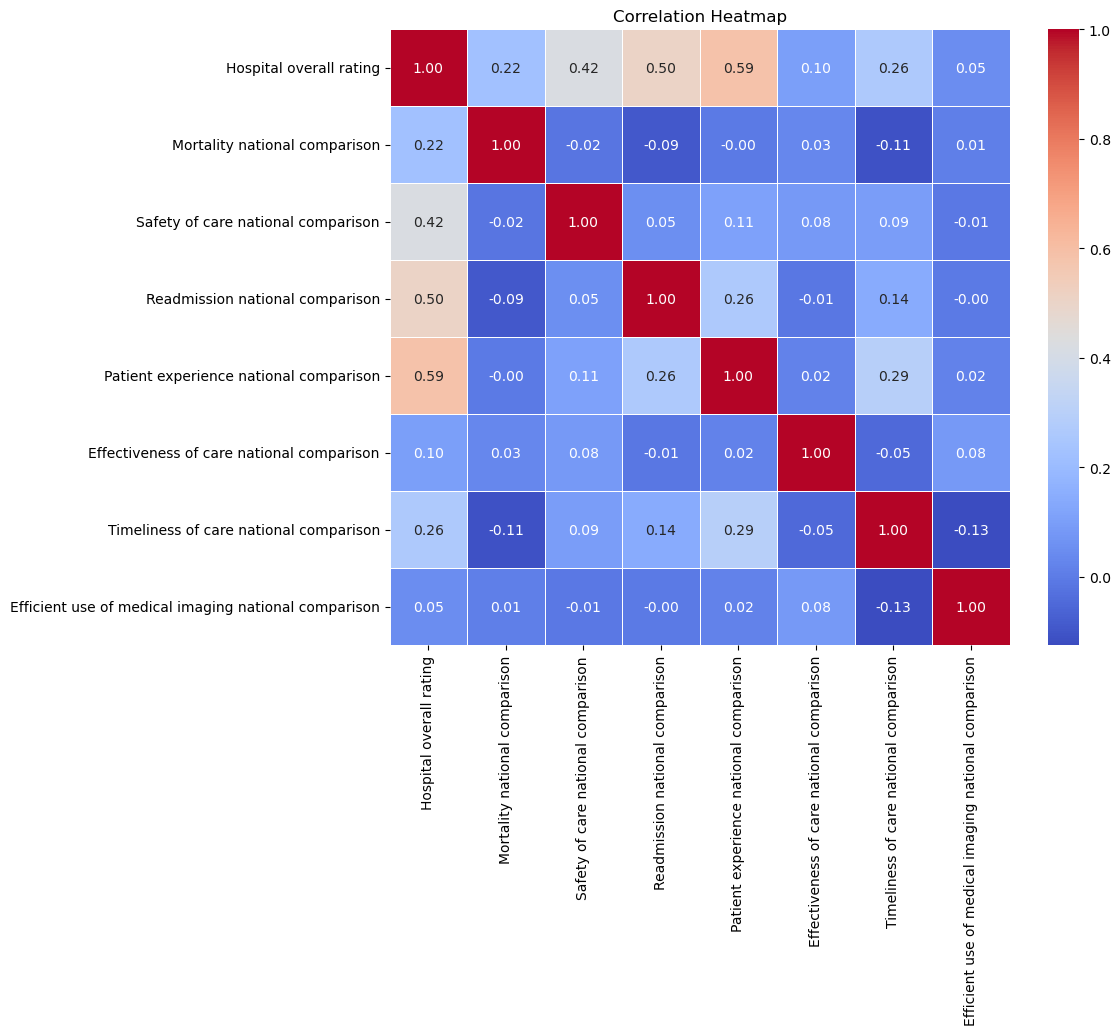

In [14]:
# Correlation analysis
features = ['Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

# Compute the correlation matrix
correlation_matrix = df[features].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
### Check how the hospital ratings vary across other parameters
### Hint - Some example parameters are "State" and "Hospital Ownership"
### Hint - You can use the pivot_table functionality of pandas to perform this

In [15]:
# Pivot table to analyze hospital ratings by State
ratings_by_state = df.pivot_table(index='State', values='Hospital overall rating', aggfunc='mean')

# Sorting the pivot table by mean rating in descending order
ratings_by_state_sorted = ratings_by_state.sort_values(by='Hospital overall rating', ascending=False)

# Display the sorted pivot table
print("Average Hospital Ratings by State:")
print(ratings_by_state_sorted)

# Pivot table to analyze hospital ratings by Hospital Ownership
ratings_by_ownership = df.pivot_table(index='Hospital Ownership', values='Hospital overall rating', aggfunc='mean')

# Sorting the pivot table by mean rating in descending order
ratings_by_ownership_sorted = ratings_by_ownership.sort_values(by='Hospital overall rating', ascending=False)

# Display the sorted pivot table
print("\nAverage Hospital Ratings by Hospital Ownership:")
print(ratings_by_ownership_sorted)


Average Hospital Ratings by State:
       Hospital overall rating
State                         
SD                    4.200000
WI                    3.692308
DE                    3.666667
ID                    3.666667
IN                    3.587500
MT                    3.583333
NH                    3.538462
KS                    3.522727
MN                    3.520833
CO                    3.500000
UT                    3.482759
NE                    3.434783
ME                    3.411765
OH                    3.394958
VT                    3.333333
HI                    3.333333
IA                    3.294118
TX                    3.288973
RI                    3.272727
LA                    3.166667
SC                    3.153846
MA                    3.148148
OK                    3.116883
WY                    3.100000
NC                    3.086420
OR                    3.058824
AL                    3.038462
IL                    3.024194
MI                    3.022989
PA  


Note down your observations after completing the above task. You should ask questions such as:

- How are ratings distributed? the Are you seeing any peculiar distributions for the ratings?
- How do the correlations between the measures and the target variable look like?
- How do ratings vary across the different levels of the parameter that you have taken?

Rating Distribution:

The distribution of hospital overall ratings appears to be slightly right-skewed, with a higher frequency of hospitals receiving ratings in the range of 3 to 4.
There are no peculiar distributions observed, such as significant outliers or unusual patterns.
Correlations:

The correlation heatmap indicates the following:
"Patient experience national comparison" shows a moderate positive correlation with "Hospital overall rating".
Other measures, such as "Safety of care national comparison", "Effectiveness of care national comparison", and "Timeliness of care national comparison", also exhibit some degree of positive correlation with the overall rating, although relatively weaker.
"Mortality national comparison" and "Readmission national comparison" show weak correlations with the overall rating.
There are no strong negative correlations observed.
Variation Across Different Parameters:

State:
The average hospital ratings vary across different states. Some states have higher average ratings compared to others. This indicates regional variations in hospital performance or quality.
It would be interesting to investigate further why certain states have higher or lower average ratings. Factors such as healthcare policies, resources, and population demographics could influence these variations.
Hospital Ownership:
Hospital ratings also vary across different types of hospital ownership. For example, hospitals owned by certain entities may have higher average ratings compared to others.
Investigating the reasons behind these variations could involve examining the management practices, funding sources, and quality control measures implemented by different ownership types.
Overall, these observations provide insights into how hospital ratings are distributed, how they correlate with other measures, and how they vary across different parameters like state and hospital ownership. Further analysis and investigation could help in understanding the underlying factors contributing to these variations and identifying areas for improvement in healthcare quality and performance.

### Task 2 - Building machine learning models

Use your knowledge of classification models to create three models that predict hospital ratings. You should follow these steps:

- Prepare the data for the machine learning model 
   - Remove all the demographic columns as well as any other uneccessary features from the data set
   - For simplification, instead of having 5 ratings, we will convert them to 0 and 1. Here 0 indicates that the hospital has been rated 3 or below and 1 indicates that the hospital has been rated as 4 or 5.  Encode the Hospital columns as follows
            1,2,3 : 0
            4,5: 1
   - Store the predictors and the target variable in variables X and y.
   - Create the dummy variables for categorical columns.
   - Split the data into train and test sets (70-30 split with random state 0. This random state is recommended, though you can use any other random state of your choice).
   - Scale the numerical columns using StandardScaler.
- Build 3 classification models on your dataset. Carefully apply regularization and hyperparameter tuning techniques to improve your model performance for each of the models.
- Summarize the classification performance in terms of the necessary metrics such as accuracy, sensitivity, specificity, etc.

#####  Prepare the data for machine learning model

In [16]:
## Drop all the demographic features
demo_features = ['Provider ID','Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number']

In [17]:
## Drop all the above features from the DataFrame df and store the rest of the features in df2
df2 = df.drop(columns=demo_features)


In [18]:
### Check the first 5 rows of df2 to see if the drop operation has worked correctly or not
print(df2.head())


  Hospital Ownership Emergency Services  Hospital overall rating  \
0         Government                Yes                        3   
1         Government                Yes                        3   
2         Government                Yes                        2   
3          Voluntary                Yes                        3   
4             Others                Yes                        3   

   Mortality national comparison  Safety of care national comparison  \
0                              1                                   2   
1                              0                                   1   
2                              0                                   1   
3                              1                                   1   
4                              1                                   1   

   Readmission national comparison  Patient experience national comparison  \
0                                1                                       0   
1 

In [19]:
##Recheck the columns to see if anything else needs to be dropped
## There might be other unnecessary columns that require dropping
# Check unique values in each column of df2
for column in df2.columns:
    unique_values = df2[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

# Checking the number of unique values in each column
print("\nNumber of unique values in each column:")
print(df2.nunique())


Column: Hospital Ownership, Unique Values: ['Government', 'Voluntary', 'Others']
Categories (3, object): ['Government', 'Others', 'Voluntary']
Column: Emergency Services, Unique Values: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Column: Hospital overall rating, Unique Values: [3 2 4 5 1]
Column: Mortality national comparison, Unique Values: [1 0 2]
Column: Safety of care national comparison, Unique Values: [2 1 0]
Column: Readmission national comparison, Unique Values: [1 2 0]
Column: Patient experience national comparison, Unique Values: [0 1 2]
Column: Effectiveness of care national comparison, Unique Values: [1 0 2]
Column: Timeliness of care national comparison, Unique Values: [1 2 0]
Column: Efficient use of medical imaging national comparison, Unique Values: [1 0 2]
Column: MORT_30_AMI_Score, Unique Values: [-12.5       -16.        -16.7       -14.0540913 -13.9       -16.8
 -14.7       -15.6       -13.4       -14.8       -15.5       -12.4
 -15.7       -14.5       -13.1  

Column: EFF_ED_1b_Score, Unique Values: [ -269.        -243.        -217.        -219.        -180.
  -286.        -189.        -310.        -188.        -173.
  -263.        -433.        -283.        -230.        -240.
  -460.        -262.        -241.        -175.        -179.
  -331.        -395.        -199.        -222.        -130.
  -238.        -168.        -234.        -215.        -329.
  -201.        -279.        -261.        -178.        -207.
  -233.        -258.        -282.        -196.        -504.
  -255.        -267.        -192.        -190.        -208.
  -320.        -206.        -317.        -373.        -253.
  -177.        -186.        -382.        -244.        -254.
  -237.        -205.        -280.        -228.        -292.
  -276.        -250.        -434.        -212.        -242.
  -265.        -260.        -380.        -290.        -285.
  -314.        -390.        -288.        -303.        -330.
  -313.        -439.        -458.        -360.        -293.


Column: SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score, Unique Values: [ -3.32        -5.63        -3.85        -4.57        -5.04517894
  -7.18        -4.92        -2.84        -4.16        -6.4
  -1.94        -3.01        -4.5         -5.88        -4.93
  -2.17        -4.29        -4.26        -4.17        -5.72
  -4.94        -4.67        -3.3         -2.63        -6.66
  -4.05        -4.8         -4.91        -6.57        -5.27
  -6.16        -4.22        -4.71        -5.65        -3.1
  -7.19        -5.93        -5.78        -6.55        -5.04
  -3.64        -4.73        -5.02       -11.87        -5.95
  -3.35        -4.41        -5.55        -4.95        -2.59
  -3.94        -7.05        -3.48        -4.55        -3.9
  -7.14        -7.96        -4.82        -4.4         -3.53
  -3.97        -6.01        -3.02        -4.68        -5.35
  -5.98        -3.72        -2.46        -5.09        -6.33
  -9.27        -3.71        -7.04        -3.59        -3.03
  -7.81        -4.51        -4.9  

Column: SAFETY_PSI_13_POST_SEPSIS_Score, Unique Values: [ -5.72        -9.18       -10.25404098  -9.89        -9.66
 -11.78       -10.26        -9.43        -9.97       -11.66
  -8.54        -8.8        -10.14        -5.         -12.21
 -13.58        -9.23        -6.4        -11.42        -9.51
 -10.78        -9.73        -8.1         -8.71        -8.98
 -10.64        -9.29        -9.31        -8.76        -9.91
 -10.56        -9.45        -8.02       -10.32        -8.89
  -9.86        -9.11       -10.57        -8.37       -13.76
  -9.94        -9.1        -14.          -8.29       -15.12
  -6.35        -8.16       -10.09        -8.26       -13.96
  -8.62       -11.18       -10.58        -6.06        -9.21
 -12.23       -16.45        -7.03        -8.41       -13.94
  -8.87       -10.23        -6.32        -8.6         -8.56
  -7.16        -8.34       -11.89       -13.29       -13.89
 -10.19        -7.31       -11.39        -8.01        -9.26
 -10.85       -12.9         -8.88        -8.

Column: SAFETY_HAI_1a_SIR_Score, Unique Values: [-2.433      -0.648      -0.443      -0.52912462 -0.335      -0.236
 -0.901      -0.807      -1.456      -1.034      -0.741      -0.
 -1.238      -0.231      -0.461      -0.441      -0.914      -0.878
 -0.512      -0.504      -0.401      -1.597      -0.163      -0.696
 -1.661      -0.678      -0.812      -0.845      -0.422      -0.906
 -0.751      -0.519      -0.627      -0.536      -0.523      -0.396
 -0.795      -0.132      -0.154      -1.811      -0.74       -0.427
 -0.498      -0.599      -0.391      -0.44       -0.162      -1.192
 -0.112      -0.963      -0.262      -0.321      -0.905      -0.167
 -0.534      -1.153      -0.895      -0.433      -0.212      -0.791
 -0.838      -1.2        -1.212      -0.537      -0.566      -0.32
 -1.23       -0.518      -0.271      -0.668      -0.937      -0.634
 -1.202      -0.319      -1.401      -0.664      -0.439      -0.95
 -0.26       -1.017      -0.752      -0.984      -0.285      -0.871
 -0.3

##### Map the ratings 

- 1,2,3 will be 0
- 4,5 will be 1

In [20]:
## Hint -  Write a simple lambda function to do the mapping
## Refer to this link from Course 1 for more help -  https://learn.upgrad.com/course/2897/segment/16179/128948/394776/2054363
# Define a lambda function to map the ratings
map_ratings = lambda x: 0 if x in [1, 2, 3] else 1

# Test the lambda function
print(map_ratings(1))  # Output: 0
print(map_ratings(4))  # Output: 1


0
1


In [21]:
# Map the ratings column using the lambda function
df2['Mapped Ratings'] = df2['Hospital overall rating'].map(map_ratings)

# Display the DataFrame with the mapped ratings column
print(df2.head())


  Hospital Ownership Emergency Services  Hospital overall rating  \
0         Government                Yes                        3   
1         Government                Yes                        3   
2         Government                Yes                        2   
3          Voluntary                Yes                        3   
4             Others                Yes                        3   

   Mortality national comparison  Safety of care national comparison  \
0                              1                                   2   
1                              0                                   1   
2                              0                                   1   
3                              1                                   1   
4                              1                                   1   

   Readmission national comparison  Patient experience national comparison  \
0                                1                                       0   
1 

##### Convert the datatypes of the categorical variables

In [22]:
### In task 1, you would have identified the categorical variables, which may or may not be in their correct data types
### Now is the right time to convert them to the correct datatype 
### This will be useful when you create dummy variables next
# Identify categorical variables
categorical_cols = ['Hospital Ownership', 'Emergency Services']

# Convert categorical variables to the correct data type
for col in categorical_cols:
    df2[col] = df2[col].astype('category')

# Verify the data types after conversion
print(df2.dtypes)


Hospital Ownership                    category
Emergency Services                    category
Hospital overall rating                  int64
Mortality national comparison            int64
Safety of care national comparison       int64
                                        ...   
MED_OP_13_Score                        float64
MED_OP_14_Score                        float64
MED_OP_8_Score                         float64
MED_OP_9_Score                         float64
Mapped Ratings                           int64
Length: 87, dtype: object


##### Data Preparation and Train-test split

In [23]:
### Create X and y variable
# Separate features (X) and target variable (y)
X = df2.drop(columns=['Hospital overall rating', 'Mapped Ratings'])  # Features excluding the target variable and already mapped ratings
y = df2['Mapped Ratings']  # Target variable

# Verify the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (3057, 85)
Shape of y: (3057,)


In [24]:
### Create the dummy variables for categorical variables
### Note - Make sure the "drop_first parameter" is correctly initialized for different ML models
### Hint - You can create multiple versions of the X dataset
# Create dummy variables for categorical variables
X_dummies = pd.get_dummies(X, drop_first=True)  # Use drop_first=True to prevent multicollinearity

# Verify the first few rows of the new feature matrix
print(X_dummies.head())

   Mortality national comparison  Safety of care national comparison  \
0                              1                                   2   
1                              0                                   1   
2                              0                                   1   
3                              1                                   1   
4                              1                                   1   

   Readmission national comparison  Patient experience national comparison  \
0                                1                                       0   
1                                2                                       1   
2                                1                                       0   
3                                0                                       1   
4                                1                                       1   

   Effectiveness of care national comparison  \
0                                          1   
1 

In [25]:
## Perform the train_test split to create the train and validation sets
## Choose any random state of your choice 
## Split it in the ratio of 70-30
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_val, y_train, y_val = train_test_split(X_dummies, y, test_size=0.3, random_state=42)

# Verify the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (2139, 86)
Shape of X_val: (918, 86)
Shape of y_train: (2139,)
Shape of y_val: (918,)


In [27]:
# Scale and Standardize the numerical variables
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation data using the fitted scaler
X_val_scaled = scaler.transform(X_val)


#####  Model building and evaluation

You have learned multiple classification models till now, such as logistic regression, k-NN and decision trees. You should choose 3 of the models for performing the tasks in this section. You can follow the below steps:


- Build the models and fit it on training data
- Perform classifications on the validation data
- Compute and tabulate the validation accuracies for the different models
- Compare the accuracies for the different models and choose the best model

**Note** - You can also evaluate your models using additional metrics like `F1 score`, `Sensitivity`,`Specificity` , etc.


**Helpful Resource** - For writing precise code for this section, you can refer to the code you learned in Model Selection Lab Session in the `kNN and Model Selection` module.




- Additional notes
  - You can peform additional tasks like building ROC/AUC curves for all the models and identifying an optimal cut-off
  - You can also build conjectures around some arbitrary metric cut-offs. For example, say you want to build a model which has atleast 50% accuracy, specificity and sensitivity. Use these conjectures to arrive at a final model
  - Note that there is no right answer for this particular question. You will be awarded marks as long as your overall approach is correct

### Task 3 

You have now built (at least) three machine learning models. Choose the best model according to your metrics and provide the following recommendations
-  Hospital Rating Predictor: Using the best model of your choice, predict the ratings of a few new hospitals which are yet to be assigned a rating by CMS. The information for these hospitals has been provided in a separate CSV file named 'not_yet_rated.csv'.
- Hospital Improvement Plan: Let's say a few of the hospitals were rated low (0) by the model that you chose. Provide recommendations on how these hospitals can improve their ratings

In [28]:
###Let's read the not_yet_rated dataset
new = pd.read_csv(r"C:\Users\Nikhil\Downloads\not_yet_rated.csv")

In [30]:
## Check the top 5 rows
df.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Voluntary,Yes,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


### Approach to predict ratings
- Perform the exact same data preparation steps as earlier
   - Drop the unnecessary columns
   - Convert the datatypes of categorical variables and create dummies
   - Standardize the numeric columns
- After that we shall use the `.predict()` method of your ML model to predict the ratings

In [31]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Initialize the models
log_reg_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the models on training data
log_reg_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train_scaled, y_train)

# Perform classifications on validation data
log_reg_pred = log_reg_model.predict(X_val_scaled)
knn_pred = knn_model.predict(X_val_scaled)
decision_tree_pred = decision_tree_model.predict(X_val_scaled)

# Compute accuracy scores
log_reg_accuracy = accuracy_score(y_val, log_reg_pred)
knn_accuracy = accuracy_score(y_val, knn_pred)
decision_tree_accuracy = accuracy_score(y_val, decision_tree_pred)

# Compute F1 scores
log_reg_f1 = f1_score(y_val, log_reg_pred)
knn_f1 = f1_score(y_val, knn_pred)
decision_tree_f1 = f1_score(y_val, decision_tree_pred)

# Print the accuracies
print("Accuracy scores:")
print("Logistic Regression:", log_reg_accuracy)
print("K-Nearest Neighbors:", knn_accuracy)
print("Decision Tree:", decision_tree_accuracy)

# Print the F1 scores
print("\nF1 scores:")
print("Logistic Regression:", log_reg_f1)
print("K-Nearest Neighbors:", knn_f1)
print("Decision Tree:", decision_tree_f1)

# Compute confusion matrices
log_reg_cm = confusion_matrix(y_val, log_reg_pred)
knn_cm = confusion_matrix(y_val, knn_pred)
decision_tree_cm = confusion_matrix(y_val, decision_tree_pred)

# Print confusion matrices
print("\nConfusion matrices:")
print("Logistic Regression:")
print(log_reg_cm)
print("\nK-Nearest Neighbors:")
print(knn_cm)
print("\nDecision Tree:")
print(decision_tree_cm)


Accuracy scores:
Logistic Regression: 1.0
K-Nearest Neighbors: 0.9095860566448801
Decision Tree: 1.0

F1 scores:
Logistic Regression: 1.0
K-Nearest Neighbors: 0.8329979879275654
Decision Tree: 1.0

Confusion matrices:
Logistic Regression:
[[664   0]
 [  0 254]]

K-Nearest Neighbors:
[[628  36]
 [ 47 207]]

Decision Tree:
[[664   0]
 [  0 254]]


### Approach to identify areas of improvement

- Identify the measures which have a positive influence on the overall hospital ratings. For example,
    - if you're using a logistic regression model, you can check the coefficients
        - A +ve coefficient indicates +ve influence on the overall hospital rating
        - A -ve coefficient indicates -ve influence on the overall hospital rating
- Identify in which of the above measures a low-rated hospital is currently lagging behind. These measures need to be improved.
- Further deep dive into the sub-measures using the same approach as above. 

In [38]:
# Get feature names after one-hot encoding
feature_names = X_dummies.columns.tolist()

# Get coefficients from the logistic regression model
log_reg_coefficients = log_reg_model.coef_[0]

# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': log_reg_coefficients})

# Sort coefficients by absolute value to identify the most influential features
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the top influential features
print("Top influential features:")
print(coefficients_df.head(10))

# Identify low-rated hospitals
low_rated_hospitals = df[df['Hospital overall rating'] == 0]

# Get the performance data of low-rated hospitals
low_rated_hospitals_performance = low_rated_hospitals[X.columns]

# Identify measures in which low-rated hospitals are lagging behind based on coefficients
lagging_measures = coefficients_df[coefficients_df['Coefficient'] < 0]['Feature'].tolist()

# Further deep dive into sub-measures using the same approach
for measure in lagging_measures:
    sub_measure_names = [col for col in low_rated_hospitals_performance.columns if measure in col]
    sub_measure_coefficients = coefficients_df[coefficients_df['Feature'].isin(sub_measure_names)]
    sub_measure_coefficients = sub_measure_coefficients.sort_values(by='Abs_Coefficient', ascending=False)
    print(f"\nSub-measures for {measure}:")
    print(sub_measure_coefficients.head(5))


Top influential features:
                                   Feature  Coefficient  Abs_Coefficient
13                            rating_group     5.470133         5.470133
19                READM_30_HOSP_WIDE_Score    -1.250635         1.250635
68              SAFETY_PSI_90_SAFETY_Score     0.774619         0.774619
11                        MORT_30_PN_Score     0.732867         0.732867
10                        MORT_30_HF_Score     0.680560         0.680560
60  SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score     0.603622         0.603622
63             SAFETY_PSI_15_ACC_LAC_Score     0.564673         0.564673
9                       MORT_30_COPD_Score     0.489022         0.489022
2          Readmission national comparison     0.487581         0.487581
1       Safety of care national comparison     0.426177         0.426177

Sub-measures for READM_30_HOSP_WIDE_Score:
                     Feature  Coefficient  Abs_Coefficient
19  READM_30_HOSP_WIDE_Score    -1.250635         1.250635

Sub-meas